### IBM Employee Attrition

### Overview

Employee attrition is the loss of employees in a company due to certain factors such as retirement, resignation, or elimination of a position. It is the natural process by which employees leave the workforce and are not immediately replaced

Employee attrition can have a significant impact on a company’s bottom line. It can lead to increased costs associated with recruiting and training new employees. It can also lead to decreased productivity and morale among remaining employees

Uncover the factors that lead to employee attrition and explore important questions

In [64]:
# import important libraries
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [65]:
# connecting to the database
sq_connect = sqlite3.connect('attr_data.db')

In [66]:
# import Data rom database
#table name is attrition_records
df = pd.read_sql('SELECT * FROM attrition_records', sq_connect)
df

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [67]:
# to view column names
df.columns

Index(['id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [68]:
#Checking the various datatypes in the Data
df.dtypes

id                           int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel    

INFERENCE:

Data consists mainly of integers and objects(strings)

In [69]:
# having information about the dataset 
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [70]:
# checking for column and row
df.shape

(1470, 36)

INFERENCE:

from the Dataset, we have 1470 IBM Employees

In [71]:
# checking for number of unique values
df.nunique()

id                          1470
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTi

In [72]:
# checking or missing data
df.isna().sum()

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

INFERENCE:

No missing data ound in the dataset

### Data Cleaning

The 'ID' and other stated columns will be dropped as they are not useful



In [73]:
# dropping the ID column as it is not needed for further analysis
df.drop(['id'], axis=1, inplace=True)

In [74]:
# dropping columns (Intution)
columns = ['DailyRate', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate', 'RelationshipSatisfaction', 'StandardHours']
df.drop(columns, axis=1, inplace=True)

### Exploratory Data Analysis

In [75]:
# checking the first 5 rows in the dataset
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,11,3,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,23,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,15,3,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,11,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,12,3,1,6,3,3,2,2,2,2


In [76]:
# value count for attrition feature
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:>

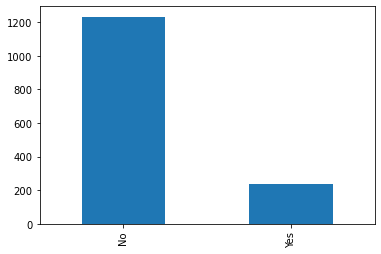

In [77]:
# plotting the attrition feature
df['Attrition'].value_counts().plot.bar()

INFERENCE:

The above bar plot shows that out of a total o 1470 IBM Employees, 237 employees left while 1233 employees stayed.

Text(0.5, 1.0, 'Distribution o Employee Attrition')

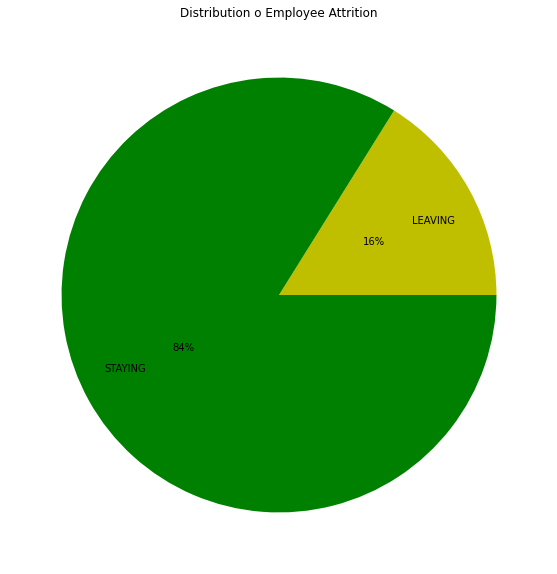

In [78]:
# plotting a distribution to check the attrition rate
plt.figure(figsize=(10,10))
plt.pie(x=[237, 1233], labels=['LEAVING', 'STAYING'], autopct='%1.0f%%', pctdistance=0.5, labeldistance=0.7, colors=['y','g'])
plt.title('Distribution o Employee Attrition')

INFERENCE:

The pie plot above shows the probabilty of IBM Employees that will be leaving(16%) and those that'll be staying(84%) 

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Education                1470 non-null   int64 
 6   EducationField           1470 non-null   object
 7   EnvironmentSatisfaction  1470 non-null   int64 
 8   Gender                   1470 non-null   object
 9   JobInvolvement           1470 non-null   int64 
 10  JobLevel                 1470 non-null   int64 
 11  JobRole                  1470 non-null   object
 12  JobSatisfaction          1470 non-null   int64 
 13  MaritalStatus            1470 non-null   object
 14  MonthlyIncome            1470 non-null  

### Visualizing Categorical Features

1. BusinessTravel

2. Department

3. EducationField

4.  Gender

5. JobRole

6. MaritalStatus

7. Over18

8. OverTime

In [80]:
#value counts On BusinessTravel
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [81]:
#value counts On Department
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [82]:
#value counts On EducationField
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [85]:
#value counts On Gender
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [86]:
#value counts On JobRole
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [87]:
#value counts On MaritalStatus
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [88]:
#value counts On Over18
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [89]:
#value counts On OverTime
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

[Text(0.5, 0, 'EducationField'), Text(0, 0.5, 'Frequency of EducationField')]

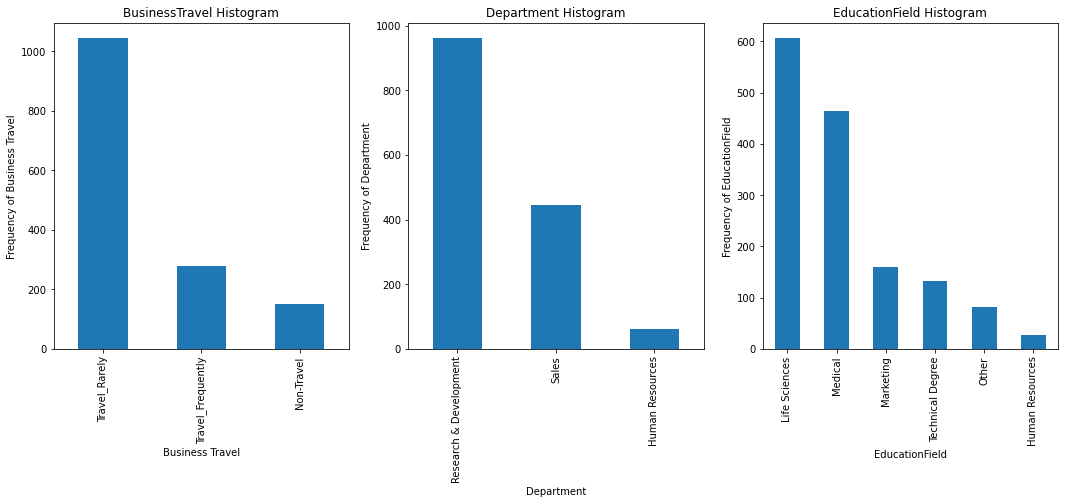

In [91]:
# plotting Histogram or BusinessTravel, Department & EducationField
plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
plt1 = df.BusinessTravel.value_counts().plot(kind='bar')
plt.title('BusinessTravel Histogram')
plt1.set(xlabel = 'Business Travel', ylabel='Frequency of Business Travel')

plt.subplot(1,3,2)
plt1 = df.Department.value_counts().plot(kind='bar')
plt.title('Department Histogram')
plt1.set(xlabel = 'Department', ylabel='Frequency of Department')

plt.subplot(1,3,3)
plt1 = df.EducationField.value_counts().plot(kind='bar')
plt.title('EducationField Histogram')
plt1.set(xlabel = 'EducationField', ylabel='Frequency of EducationField')

INFERENCE:

From the BusinessTravel Histogram,the employees that Travel_Rarely is the highest with a high margin compared to those who Travel_Frequently, the Non_Travel employees are the least of the three.

From the Department Histogram, the employees in the Research&Development Department is the highest compared to those in the Sales Department.

From the EducationField Histogram, it can be deduced the most of the employees are of Life Sciences and Medical Education compared to other education fields.

[Text(0.5, 0, 'MaritalStatus'), Text(0, 0.5, 'Frequency of MaritalStatus')]

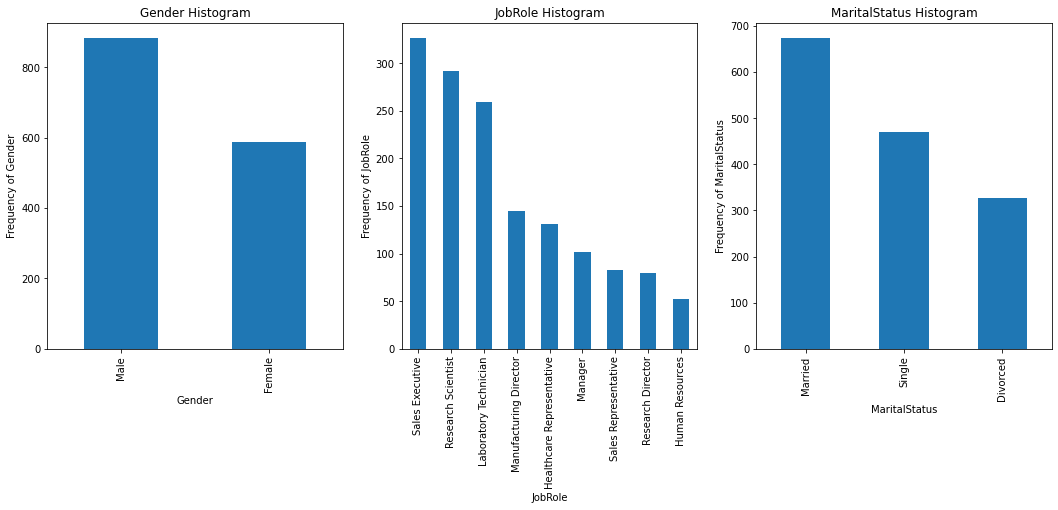

In [92]:
# plotting Histogram for Gender, JobRole & MaritalStatus
plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
plt1 = df.Gender.value_counts().plot(kind='bar')
plt.title('Gender Histogram')
plt1.set(xlabel = 'Gender', ylabel='Frequency of Gender')

plt.subplot(1,3,2)
plt1 = df.JobRole.value_counts().plot(kind='bar')
plt.title('JobRole Histogram')
plt1.set(xlabel = 'JobRole', ylabel='Frequency of JobRole')

plt.subplot(1,3,3)
plt1 = df.MaritalStatus.value_counts().plot(kind='bar')
plt.title('MaritalStatus Histogram')
plt1.set(xlabel = 'MaritalStatus', ylabel='Frequency of MaritalStatus')

INFERENCE:

From the Gender Histogram, it can be deduced that IBM Employees consists more of Male than Female employees

From the JobRole Histogram, it can be deduced that most of the IBM Employes are Sales Executives, Research Scientists & Laboratory Technicians compared to other Job roles in the irm

From the MaritalStatus Histogram, it can be deduced that IBM employees in the Married category is higher than those in the Single and Divorced category, the Divorcwd category being the least.

[Text(0.5, 0, 'OverTime'), Text(0, 0.5, 'Frequency of OverTime')]

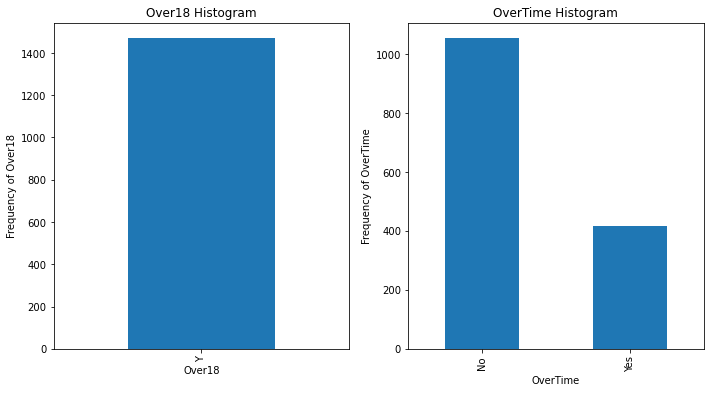

In [94]:
# plotting Histogram for Over18 and OverTime
plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
plt1 = df.Over18.value_counts().plot(kind='bar')
plt.title('Over18 Histogram')
plt1.set(xlabel = 'Over18', ylabel='Frequency of Over18')

plt.subplot(1,3,2)
plt1 = df.OverTime.value_counts().plot(kind='bar')
plt.title('OverTime Histogram')
plt1.set(xlabel = 'OverTime', ylabel='Frequency of OverTime')

INFERENCE:

From the Over18 Histogram, it can be deduced that all IBM Employees are over 18 years.

From the OverTime Histogram, it can be deduced that most of the IBM Employees in the Dataset do not work overtime compared to those who do.

([], [])

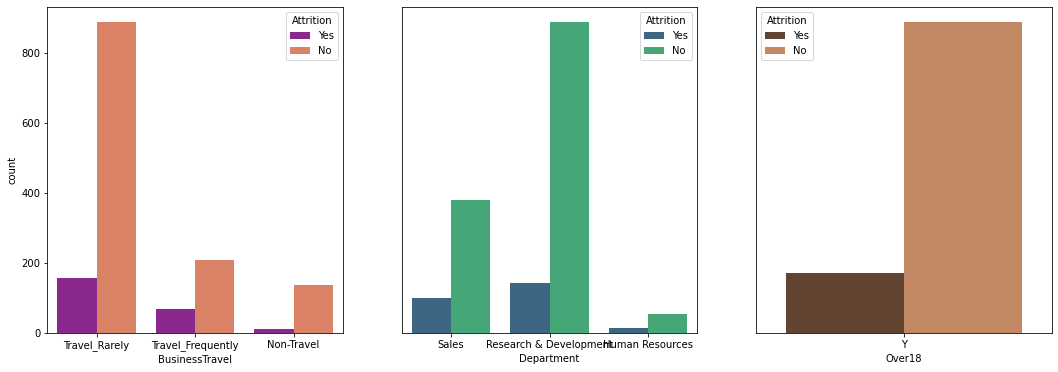

In [98]:
# making a plot or BUsinessTravel, Department, Over18 feature and comparing it to Attrition feature
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.countplot(x='BusinessTravel', hue='Attrition', data=df,palette='plasma')

plt.subplot(1,3,2)
sns.countplot(x='Department', hue='Attrition', data=df,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(1,3,3)
sns.countplot(x='Over18', hue='Attrition', data=df,palette='copper')
plt.ylabel(' ')
plt.yticks([ ])


INFERENCE:

Checking the correlation between BusinessTravel and Attrition, it shows that Employees who rarely make business travels have a higher probability of Leaving than those who frequently make Business travels and those that are Non-Travel Employees.

Checking the correlation between Department and Attrition, it show that Employees who belong to the Research & Development Department have the highest probability of attrition compared to Employees who belong to the Sale and Human Resources Department.

Checking the correlation between Over18 feature and Attrition, it shows that the employees that leave are over 18.

([], [])

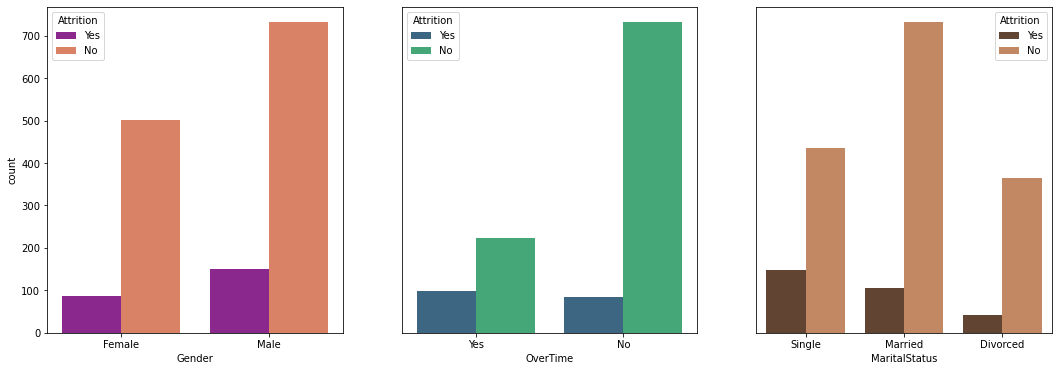

In [99]:
# making a plot or Gender, OverTime, MaritalStatus feature and comparing it to Attrition feature
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.countplot(x='Gender', hue='Attrition', data=df,palette='plasma')

plt.subplot(1,3,2)
sns.countplot(x='OverTime', hue='Attrition', data=df,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(1,3,3)
sns.countplot(x='MaritalStatus', hue='Attrition', data=df,palette='copper')
plt.ylabel(' ')
plt.yticks([ ])

INFERENCE:

Checking the correlation between Gender and Attrition, Male Emplyees have a higher probability of leaving compared to female Employees.

Checking the correlation between OverTime and Attrition, Employees who work overtime have a higher probability of leaving compared to those who do not work overtime.

Checking the correlation between MaritalStatus and Attrition, Employees who are single have a higher probabilty of leaving compared to Employees that are Married or Divorced.

### 1. What is the effect of age on attrition?

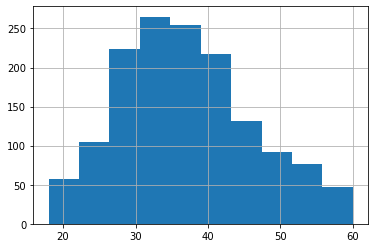

In [101]:
# plotting the age feature
df['Age'].hist();

In [102]:
# unique Age of Employees
df.Age.unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)